In [1]:
import numpy as np

# Parametros de la neurona

x1 = 25
x2 = 5
x3 = 3

w1 = 0.2
w2 = 0.4
w3 = 1.0

b = 2

# Calcular el valor de z

z = w1*x1 + w2*x2 + w3*x3 + b

print(z)


12.0


In [2]:
# Funcion de activacion (sigmoide)

def sigmoide(x):
    return 1/(1+np.exp(-x))



In [3]:
print(sigmoide(z))

0.9999938558253978


In [8]:
from re import VERBOSE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Cargar y preparar los datos
# ================================
iris = load_iris()
X = iris.data
y = iris.target

# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificación de etiquetas (One-hot)
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# División train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# 2️⃣ Definir el modelo
# ================================
model = Sequential([
    Dense(10, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# ================================
# 3️⃣ Compilar y entrenar
# ================================
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento con validación
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=10, verbose=1)




Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3975 - loss: 1.0201 - val_accuracy: 0.4000 - val_loss: 0.9816
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4518 - loss: 0.9893 - val_accuracy: 0.5000 - val_loss: 0.9415
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5911 - loss: 0.9524 - val_accuracy: 0.6000 - val_loss: 0.9043
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7319 - loss: 0.8997 - val_accuracy: 0.7000 - val_loss: 0.8665
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6633 - loss: 0.8723 - val_accuracy: 0.7000 - val_loss: 0.8319
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6757 - loss: 0.8286 - val_accuracy: 0.7000 - val_loss: 0.7957
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6176 - loss: 0.8277 - val_accuracy: 0.7000 - val_loss: 0.7553
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5974 - loss: 0.7871 - val_accuracy: 0.7000 - val_loss: 0

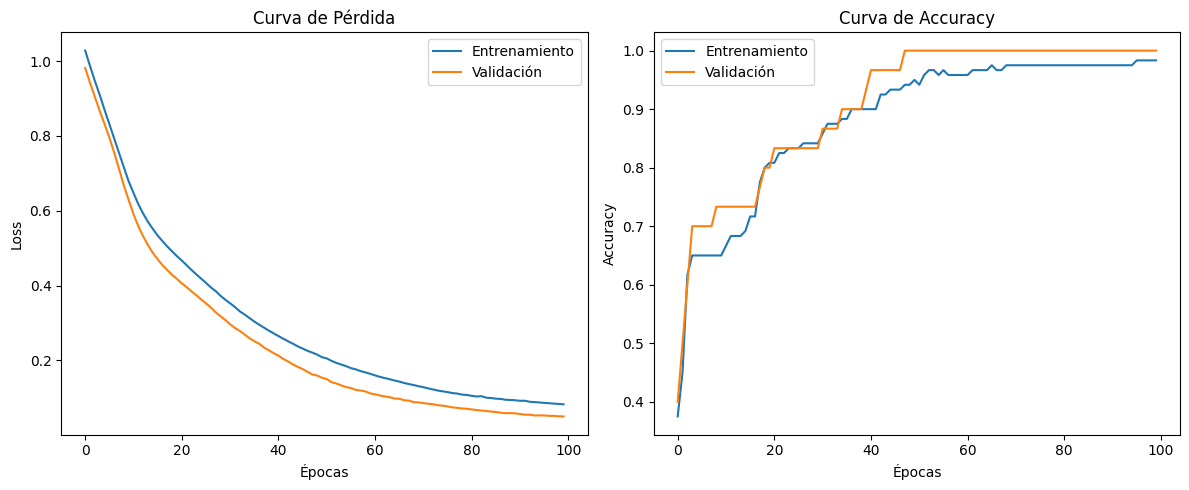

In [9]:
# ================================
# 4️⃣ Graficar curvas
# ================================
plt.figure(figsize=(12, 5))

# 🔹 Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# 🔹 Exactitud
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Época [10/100] Loss: 1.0201 | Val_Loss: 1.0080 | Acc: 0.6250 | Val_Acc: 0.6000
Época [20/100] Loss: 0.8560 | Val_Loss: 0.8305 | Acc: 0.8167 | Val_Acc: 0.8000
Época [30/100] Loss: 0.7617 | Val_Loss: 0.7312 | Acc: 0.8333 | Val_Acc: 0.8333
Época [40/100] Loss: 0.7042 | Val_Loss: 0.6570 | Acc: 0.8750 | Val_Acc: 0.9333
Época [50/100] Loss: 0.6668 | Val_Loss: 0.6271 | Acc: 0.8833 | Val_Acc: 0.9333
Época [60/100] Loss: 0.6260 | Val_Loss: 0.6039 | Acc: 0.9583 | Val_Acc: 1.0000
Época [70/100] Loss: 0.5990 | Val_Loss: 0.5959 | Acc: 0.9583 | Val_Acc: 0.9667
Época [80/100] Loss: 0.5875 | Val_Loss: 0.5909 | Acc: 0.9667 | Val_Acc: 0.9667
Época [90/100] Loss: 0.5826 | Val_Loss: 0.5802 | Acc: 0.9750 | Val_Acc: 0.9667
Época [100/100] Loss: 0.5803 | Val_Loss: 0.5726 | Acc: 0.9750 | Val_Acc: 0.9667


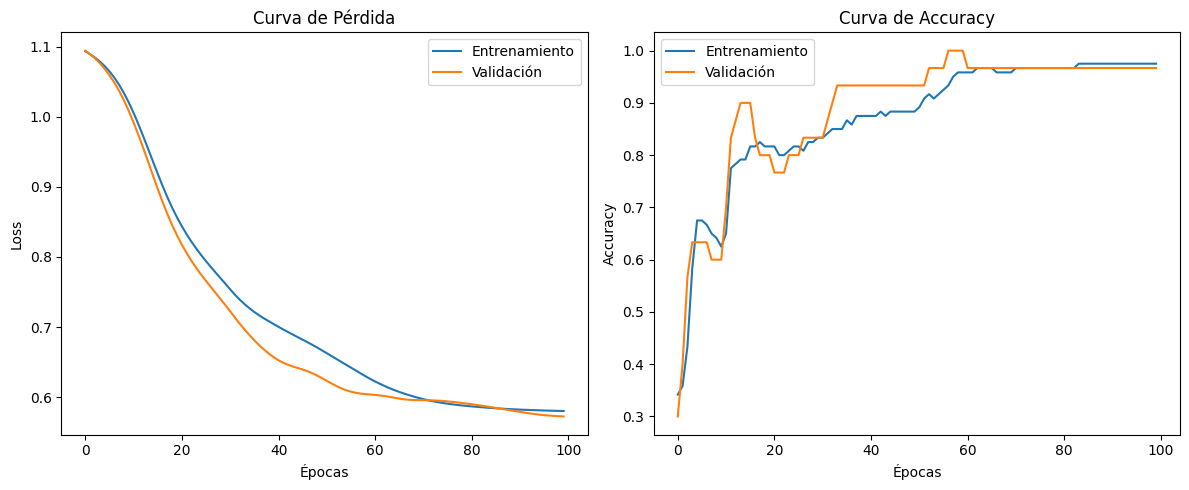

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# =====================================================
# 1️⃣ Cargar y preparar los datos
# =====================================================
iris = load_iris()
X = iris.data
y = iris.target

# Escalar features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# =====================================================
# 2️⃣ Definir el modelo (equivalente al de Keras)
# =====================================================
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

model = NeuralNet()

# =====================================================
# 3️⃣ Definir pérdida y optimizador
# =====================================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# =====================================================
# 4️⃣ Entrenamiento
# =====================================================
num_epochs = 100
train_losses, test_losses = [], []
train_acc, test_acc = [], []

for epoch in range(num_epochs):
    # ---- Forward ----
    outputs = model(X_train)
    loss = criterion(outputs, torch.argmax(y_train, dim=1))

    # ---- Backpropagation ----
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # ---- Evaluación ----
    with torch.no_grad():
        model.eval()
        test_out = model(X_test)
        test_loss = criterion(test_out, torch.argmax(y_test, dim=1))

        # Calcular accuracy
        _, train_pred = torch.max(outputs, 1)
        _, test_pred = torch.max(test_out, 1)
        train_accuracy = (train_pred == torch.argmax(y_train, 1)).float().mean()
        test_accuracy = (test_pred == torch.argmax(y_test, 1)).float().mean()

    model.train()

    # Guardar métricas
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())
    train_acc.append(train_accuracy.item())
    test_acc.append(test_accuracy.item())

    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch+1}/{num_epochs}] "
              f"Loss: {loss.item():.4f} | Val_Loss: {test_loss.item():.4f} | "
              f"Acc: {train_accuracy.item():.4f} | Val_Acc: {test_accuracy.item():.4f}")

# =====================================================
# 5️⃣ Graficar resultados
# =====================================================
plt.figure(figsize=(12,5))

# Curva de pérdida
plt.subplot(1,2,1)
plt.plot(train_losses, label='Entrenamiento')
plt.plot(test_losses, label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Curva de accuracy
plt.subplot(1,2,2)
plt.plot(train_acc, label='Entrenamiento')
plt.plot(test_acc, label='Validación')
plt.title('Curva de Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

data = pd.read_csv('cancer.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
data.drop('Unnamed: 32', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [19]:
from re import VERBOSE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Cargar y preparar los datos
# ================================
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificación de etiquetas (Binary)
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# División train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# 2️⃣ Definir el modelo
# ================================
model = Sequential([
    Dense(10, input_dim=30, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid') # Changed to 1 unit with sigmoid for binary classification
])

# ================================
# 3️⃣ Compilar y entrenar
# ================================
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed loss to binary_crossentropy

# Entrenamiento con validación
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=10, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3499 - loss: 0.9778 - val_accuracy: 0.4035 - val_loss: 0.6755
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4892 - loss: 0.5960 - val_accuracy: 0.6930 - val_loss: 0.5422
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7798 - loss: 0.5037 - val_accuracy: 0.8509 - val_loss: 0.4925
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8646 - loss: 0.4645 - val_accuracy: 0.9211 - val_loss: 0.4603
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9378 - loss: 0.4412 - val_accuracy: 0.9298 - val_loss: 0.4380
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9389 - loss: 0.4399 - val_accuracy: 0.9474 - val_loss: 0.4145
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9559 - loss: 0.4038 - val_accuracy: 0.9561 - val_loss: 0.3733
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.3371 - val_accuracy: 0.9474 - val_loss: 0.3

Test Loss: 0.1127
Test Accuracy: 0.9649


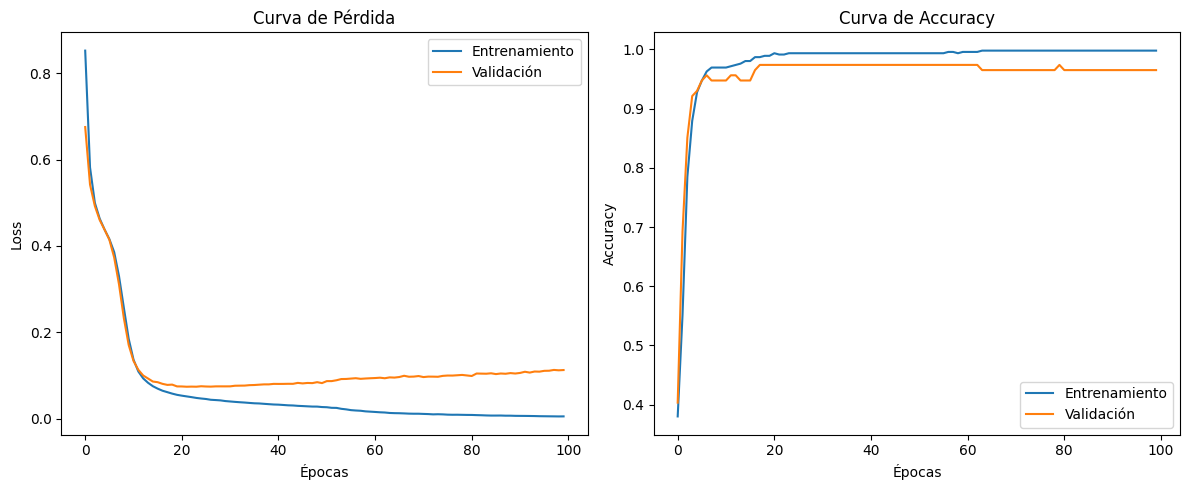

In [20]:
# ================================
# 4️⃣ Evaluar el modelo
# ================================
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# ================================
# 5️⃣ Graficar curvas
# ================================
plt.figure(figsize=(12, 5))

# 🔹 Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# 🔹 Exactitud
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


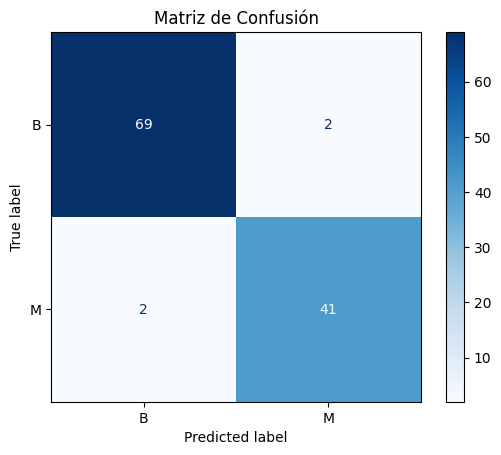

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# ================================
# 🔹 Predicciones
# ================================
y_pred = (model.predict(X_test) > 0.5).astype(int)

# ================================
# 🔹 Matriz de confusión
# ================================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("Matriz de Confusión")
plt.show()


In [22]:
data = pd.read_csv('Boston.csv')

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 561.0368 - mae: 21.6397 - val_loss: 368.1322 - val_mae: 17.2907
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 382.2303 - mae: 17.1253 - val_loss: 117.0898 - val_mae: 9.0892
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114.4566 - mae: 7.9907 - val_loss: 41.8946 - val_mae: 4.5220
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.6916 - mae: 4.8700 - val_loss: 30.1963 - val_mae: 3.6835
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.7323 - mae: 3.7451 - val_loss: 26.2283 - val_mae: 3.3588
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.0335 - mae: 3.4926 - val_loss: 23.3115 - val_mae: 3.2134
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.3012 - mae: 3.4499 - val_loss: 22.5075 - val_mae: 3.1154
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.7444 - mae: 3.4352 - val_loss: 20.0041 - val_mae: 2.9461
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0

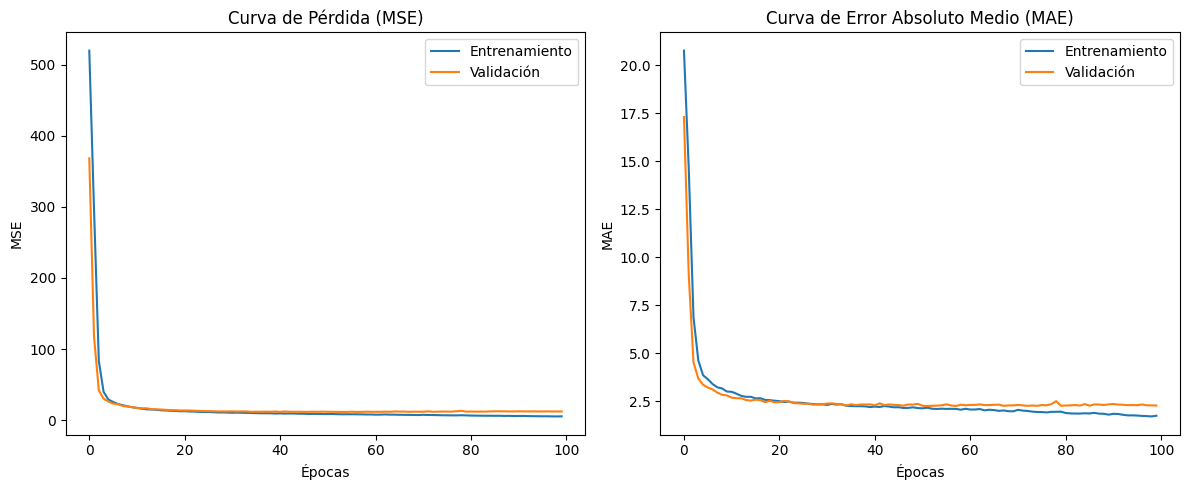

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Cargar y preparar los datos
# ================================
# (Ejemplo genérico: reemplaza 'data' y 'target' por tu dataset real)
X = data.drop('medv', axis=1)   # 13 columnas de entrada
y = data['medv']                # Variable continua

# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 2️⃣ Definir el modelo de regresión
# ================================
model = Sequential([
    Dense(64, input_dim=13, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # ✅ salida lineal para regresión
])

# ================================
# 3️⃣ Compilar y entrenar
# ================================
model.compile(
    optimizer='adam',
    loss='mse',           # ✅ Error cuadrático medio
    metrics=['mae']       # ✅ Métrica más interpretable (Error Absoluto Medio)
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=10,
    verbose=1
)

# ================================
# 4️⃣ Graficar las curvas de pérdida y MAE
# ================================
plt.figure(figsize=(12,5))

# Curva de pérdida (MSE)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida (MSE)')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()

# Curva de MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validación')
plt.title('Curva de Error Absoluto Medio (MAE)')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()
